# "Introduction to Probability Distributions"
> Shared resource from [University of Illinois](https://www.coursera.org/lecture/data-analytics-accountancy-), probability distributions with implementation
- toc: true 
- badges: true
- comments: true
- categories: [Math]
- comments: true
- author: Teja Kummarikuntla

# Introduction to Distributions
- ref: https://www.coursera.org/lecture/data-analytics-accountancy-1/introduction-to-descriptive-statistics-WDaaH
-----

Given a data set, an individual feature, or groups of features, can be converted into an empirical probability density function. An empirical density function can provide important insight into a data set, such as measures of a typical value, the variability around this typical value, and the shape of the data distribution. Often, however, we wish to understand some parent data set, from which our empirical data are sampled. In these cases, we often resort to **theoretical distributions**, which can provide invaluable guidance based on either theoretical expectations or previous applications. Theoretical distributions also can be used as generative models to create new data samples for subsequent analysis. In addition, theoretical distributions often are based on physical insights that can provide deeper insight into either our data or the process by which the data are acquired.

## Theoretical Distributions

If you wish to delve deeply into probability theory, a good place to start is the [Wikipedia][wpd] discussion on probability theory. For this course, however, we can assume, without loss of generality, that theoretical distributions come in two varieties:

1. discrete distributions, which are restricted to integer values, and
2. continuous distributions, which are restricted to real values.

While we could roll our own Python code for these distributions, there are several standard implementations for the standard theoretical distributions. We will use the best supported version that is developed and maintained by the SciPy community within the [`scipy.stats`][ss] module. To use any of the available distributions, we will import them directly. For example, to use the `uniform` distribution (talked about in the next section), we simply import the distribution directly.

```python
from scipy.stats import uniform
```

Given a theoretical distribution, we can create and use samples of random variables or sample the probability density function. Once imported, there are two ways to work with a distribution:

1. Create the distribution once, by creating the distribution with the desired parameters. Afterwards, this _frozen_ distribution’s (the name refers to the fact the distribution's parameters are fixed, or frozen solid) functions are called as needed on the already created distribution.
2. Create the distribution each time it is needed (for instance to create random samples) by specifying the distribution’s parameters every time.

We will demonstrate both approaches in this notebook. However, of these two techniques, the easiest is the first technique where the distribution is created once from fixed parameters. This also provides a potential performance boost since the distribution is effectively only created once, and subsequently reused as needed. Before we proceed with a discussion on how to use theoretical distribution functions in Python, we perform our standard imports.

-----
[wpd]: https://en.wikipedia.org/wiki/Probability_distribution

In [1]:
%matplotlib inline

# Standard imports
import numpy as np
import scipy as sp
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

# Global color definition
g_colors = [sns.xkcd_rgb['pale red'],
            sns.xkcd_rgb['denim blue'],
            sns.xkcd_rgb['bluegrey'], 
            sns.xkcd_rgb['faded green'], 
            sns.xkcd_rgb['dusty purple']]

-----

### Uniform

The simplest theoretical distribution is the _Uniform_ distribution, which has probability uniformly distributed between two end points. A Uniform distribution can be either [discrete][wud], being defined only for integer values, or [continuous][wu], being defined over all real values. In the latter case, we have a probability density function $f(x)$, which for $a \leq x \leq b$ is defined:

$$f(x) = \frac{1}{(b - a)} $$

with probability zero everywhere else.

To create a discrete uniform distribution, we use the [`randint`][sud] function from the SciPy module. We first create our distribution by passing in the two end points, after which we can apply different functions to perform specific operations. The result of this operation is the creation of a _frozen_ distribution, which allows different statistical functions to be easily applied to the created distribution without specifying the distribution parameters repeatedly (e.g., the end points of the Uniform distribution). 

The primary function we apply to a frozen distribution is the `rvs` function, which generates a sample of random values from a distribution. For example, to generate a set of ten integers from a discrete Uniform distribution between five and ten:

```python
udrv = randint(5, 10)
ddata = udrv.rvs(1000)
```

Note that since this is a random process, a different result will be produced each time a set of random variables is drawn from this distribution. Thus, one possible output from this code would be for the discrete data variable `ddata` to be `array([5, 6, 9, 7, 5, 8, 5, 9, 6, 9])`, which demonstrates that the first value, `5`, is included in the output, but the second value, `10`, is not included.

For a continuous Uniform distribution, the process is similar, but we instead use the [`uniform`][su] function from the SciPy module. For example, to draw ten, real valued random numbers from a Uniform distribution, we create a `uniform` object before sampling from this frozen distribution to obtain random data:

```python
ucrv = uniform(5, 10)
cdata = ucrv.rvs(10)
```

Once again, the continuous data `cdata` is randomly drawn, but is now composed of real values, for example:

```python
array([ 13.36813407,   8.40738799,  10.52660647,   9.83945343,
        10.5271254 ,  13.54307454,  11.77493877,  11.3713698 ,
         8.36527195,   7.58982897])
```

The SciPy distribution objects provide a rich interface that can be used to obtain statistics, including the mean, standard deviation, or median, as well as summary distributions. One of the most important is the probability mass (or **PMF** for discrete distributions) or density (or **PDF** for continuous distributions) function. Once a distribution object has been created, we can sample the PMF (or PDF) by simply calling the `pmf` (or `pdf`) function with different values for the random variable of interest. For example, if we wish to sample the PDF of the _uniform_ distribution between zero and one, we can sample the `pdf` function by using a linearly spaced set of values for `x`. 

```python
# Create distribution
ucrv = uniform(0, 1)

# Create sample points
x = np.linspace(0, 1)        

# Construct PDF
probs = ucrv.pdf(x)
```

The following code cell demonstrates this approach for both the discrete and continuous uniform distributions, where the probability is sampled over the range from zero to ten.

-----

[ss]: https://docs.scipy.org/doc/scipy/reference/stats.html

[wu]: https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)
[wud]: https://en.wikipedia.org/wiki/Discrete_uniform_distribution
[su]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html
[sud]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html

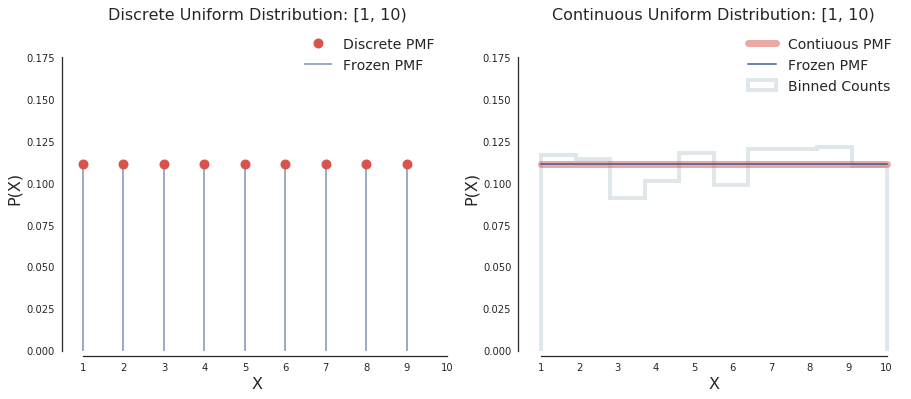

In [2]:
from scipy.stats import randint, uniform

# Set region of interest
low = 1 ; high = 10

# Define frozen distributions

# For discrete the format is a distribution [low, high)
udrv = randint(low, high)

# For continuous, the format is distribution [low, (high -low))
ucrv = uniform(low, high - low)

# Function to plot discrete distribution
def plot_pmf(axs, x, low, high, dist, froz):
    # Plot distribution PMF
    axs.plot(x, dist.pmf(x, low, high), 'o', ms=10,
             color=g_colors[0], label=f'Discrete PMF')
    
    # Plot frozen PMF
    axs.vlines(x, 0, froz.pmf(x), lw=2, alpha=0.5, 
               colors=g_colors[1], label='Frozen PMF')

# Function to plot continuous distribution
def plot_pdf(axs, x, low, high, dist, froz):
    # Plot distribution PMF
    axs.plot(x, dist.pdf(x, low, high - low), lw=7, alpha = 0.5,
             color=g_colors[0], label=f'Contiuous PMF')
    
    # Plot frozen PMF
    axs.plot(x, froz.pdf(x), lw=2, alpha=0.75, 
               color=g_colors[1], label='Frozen PMF')
    
    # Plot binned counts
    data = froz.rvs(1000)
    axs.hist(data, normed=True, histtype='step', lw=4, alpha=0.25,
            color=g_colors[2], label='Binned Counts')

# Function to make overall plot, leaves distribution plotting 
# to one of the two helper plot functions
def make_plot(axs, low, high, dist, froz, kind):
    # Decide whch helper function to call
    if kind == 'Discrete':
        # Sampling range
        x = np.arange(low, high)        
        plot_pmf(axs, x, low, high, dist, froz)
        
    elif kind =='Continuous':
        # Sampling range
        x = np.linspace(low, high)        
        plot_pdf(axs, x, low, high, dist, froz)
        
    # We scale the y-axis to allow room for the legend
    axs.set_ylim(0, 1.75 * 1.0/(high - low))

    # Decorate plot
    axs.set_xticks(np.arange(low, high + 1))
    axs.set_xlabel('X', fontsize=16)
    axs.set_ylabel(r'P(X)', fontsize=16)
    axs.set_title(f'{kind} Uniform Distribution: [{low}, {high})', fontsize=16)
    axs.legend(loc=1, fontsize=14)
    sns.despine(ax=axs, offset = 5, trim=True)

# Now plot the binomial distribution for different 
# numbers of heads in 5 coin flips
fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=2, sharey=True)

# Call our plotting routine for the different distributions
make_plot(axs[0], low, high, randint, udrv, 'Discrete')
make_plot(axs[1], low, high, uniform, ucrv, 'Continuous')

-----

### Poisson Distribution

One of the most useful discrete distribution functions is the [Poisson distribution][wpd], which expresses the probability that a given number of events will occur in a fixed interval of time or space. For example, the Poisson distribution is used to model the number goals that might be scored in a soccer match, the number of floods that occur on a particular river, or the number of geographically diverse group of people that visit an online discussion forum. Formally, the following requirements must be met for the Poisson distribution to be valid:

1. If $X$ represents the number of events that can occur in the defined interval, then $X$ can only be either zero, or a positive integer.
2. The events are independent, thus one event occurring does not impact any of the other events.
3. The rate at which events occurs is constant.
4. Two events can not occur simultaneously.
5. The probability an event occurs within a small interval is proportional to the length of the interval or the actual probability is determined by a Binomial distribution where the number of trials is much larger than the number of successes.

When these conditions are true, given a positive, real-valued rate parameter $\mu$, we have the probability of observing $X$ events in a Poisson process:

$$ P(X) = \frac{e^{-\mu} \mu^X}{X!} $$

The Poisson distribution has mean and variance equal to the rate parameter, $\mu$. The Poisson distribution can be derived as a special case of the Binomial distribution where the number of trials goes to infinity, while the number of successes remains fixed, a result known as the [Law of Rare Events][wlre].

To work with this distribution in Python, we will create the [`poisson`][sp] distribution by specifying the rate parameter to create a frozen distribution:

```python
# Create frozen Poisson Discrete Distribution (pdd)
mu = 2.5
pdd = poisson(mu)
```

The following code cell demonstrates how to use the Poisson distribution within a Python script, where we create and visually compare three different distributions, for three different rate parameters. For simplicity, we do not create frozen distributions in this example, and instead create and sample the probability mass function for each distribution as needed.

-----

[wpd]: https://en.wikipedia.org/wiki/Poisson_distribution
[wlre]: https://en.wikipedia.org/wiki/Poisson_distribution#law_of_rare_events
[sp]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

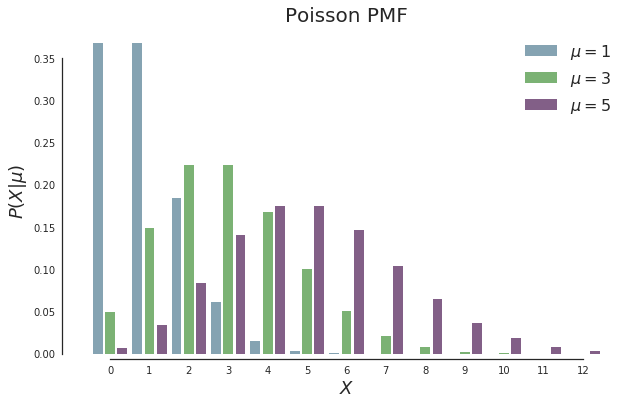

In [3]:
from scipy.stats import poisson

# Number of points to sample for each distribution
num_pts = 100

# Poisson distribution parameter definition
mu = [1., 3., 5.]

# Local label definition
labels = ['$\mu = 1$', '$\mu = 3$', '$\mu = 5$']

# Sampling points
x = np.arange(2.5 * mu[-1])

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each distribution PMF, offset them by delta to give clarity
delta = 0.25
plt.bar(x - 1.25 * delta, poisson.pmf(x, mu[0]), width=delta, color=g_colors[2], label = labels[0])
plt.bar(x, poisson.pmf(x, mu[1]), width=delta, color=g_colors[3], label = labels[1])
plt.bar(x + 1.25 * delta, poisson.pmf(x, mu[2]), width=delta, color=g_colors[4], label = labels[2])

# Decorate plot
plt.xticks(x)
plt.xlabel(r"$X$", fontsize=18)
plt.ylabel(r"$P(X|\mu)$", fontsize=18)
plt.title("Poisson PMF", fontsize=20)
plt.legend(fontsize=16)
sns.despine(trim=True, offset = 5)

-----

#### Other Discrete Distributions

In addition to the Binomial, Uniform, and Poisson distributions, there are a number of other discrete theoretical distributions that prove useful on occasion, including the
- [Boltzmann][wbd],
- [Geometric][wgd],
- [Hypergeometric][whgd], and 
- [Zipf][wzd] distributions. 

While we will not review these (or other discrete) distributions in this notebook, you should be aware of their existence in case they prove useful in a future analytics task.

-----
[wbd]: https://en.wikipedia.org/wiki/Boltzmann_distribution
[wgd]: https://en.wikipedia.org/wiki/Geometric_distribution
[whgd]: https://en.wikipedia.org/wiki/Hypergeometric_distribution
[wzd]: https://en.wikipedia.org/wiki/Zipf%27s_law

### Normal Distribution

Perhaps the most common distribution is the [_Normal_][wnd] (or Gaussian) distribution, which occurs frequently in nature and is also frequently seen as a result of the [Central Limit Theorem][wclt], which will be discussed later in this notebook. The Normal distribution is often referred to as the **bell curve** since it resembles a bell. This distribution can be used to represent the heights of a group of people errors in measurements, health measurements such as blood pressure, grades on a test, or the measurements of items manufactured by the same machine.

Given a mean value, $\mu$, and standard deviation, $\sigma$, the probability density function for a Normal distribution is given by

$$ P(X) = \frac{1}{\sqrt{2 \pi \sigma}} \ \exp^{\frac{-(X - \mu)^2}{2 \sigma^2}} $$

Note that the median, mode, and mean values all coincide for a Normal distribution, while the standard deviation measures how wide the distribution is around the central value. Given the ubiquity of the Normal distribution, you likely should memorize the percent of all data in a Normal distribution enclosed by $X$ standard deviations (i.e., $\mu \pm X \sigma$):

| $X \ \sigma$ | Percent of data enclosed | Interpretation |
| -- | -- | -- |
| 1 | 68% | Data **likely** to be contained with this interval |
| 2 | 95% | Data **very likely** to be contained with this interval |
| 3 | 99.7% |Data **almost certainly** to be contained with this interval |

An alternative form, known as the standard normal distribution, has zero mean and unit standard deviation, thus the standard normal distribution has the following probability density function:

$$ P(X) = \frac{1}{\sqrt{2 \pi}} \ \exp^{\frac{-X^2}{2}} $$

A general Normal distribution can be transformed into a standard normal distribution by
1. subtracting the mean value, and
2. dividing by the standard deviation.

This process is sometimes encoded by the [_standard score_][wzs] or _z-score_,

$$ z = \frac{x - \mu}{\sigma} $$

which has the benefit of (1) allowing different Normal distributions to be easily compared since they are all on the same scale, and (2) simplifying the interpretation of the result since the z-score implicitly is a measure of the number of standard deviations a value is from the mean of the distribution.

In Python, we create a Normal distribution by using the [`norm`][sn] object in the SciPy module, which takes a mean value and a standard deviation. For example, to create a frozen Normal distribution with $\mu = 2.5$ and $\sigma = 1.2$:

```python
from scipy.stats import norm

ncd = norm(2.5, 1.2)
```

In the following code cell, we create and contrast three different Normal distributions. In this case, we do not use frozen distributions since we create and use the different distributions in one line of code.

-----
[wnd]: https://en.wikipedia.org/wiki/Normal_distribution
[wclt]: https://en.wikipedia.org/wiki/Central_limit_theorem
[wzs]: https://en.wikipedia.org/wiki/Standard_score
[sn]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

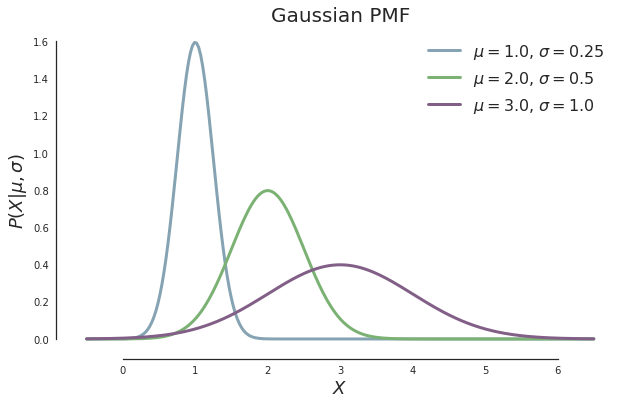

In [4]:
from scipy.stats import norm

# Number of points to sample for each distribution
num_pts = 100

# Gaussian distribution parameter definition
mu = [1., 2., 3.]
sig = [0.25, 0.5, 1.0]

# Local label definition
labels = [r'$\mu = 1.0$, $\sigma = 0.25$',
          r'$\mu = 2.0$, $\sigma = 0.5$',
          r'$\mu = 3.0$, $\sigma = 1.0$']

# Sampling points
x = np.linspace(-0.5, 6.5, 250)
fig, ax = plt.subplots(figsize=(10, 6))

# Create and Plot Normal PDFs
for idx in range(len(mu)):    
    ax.plot(x, norm.pdf(x, mu[idx], sig[idx]),
            color=g_colors[2 + idx], lw=3, label = labels[idx])

# Decorate plot
ax.set_xlabel(r"$X$", fontsize=18)
ax.set_ylabel(r"$P(X|\mu, \sigma)$", fontsize=18)
ax.set_title("Gaussian PMF", fontsize=20)
ax.legend(fontsize=16)
sns.despine(trim=True, offset = 5)

-----

## Other Continuous Distributions

While the Normal distribution is the most popular continuous distribution, there are many other continuous distributions that arise frequently in data analytics. Some of these have long histories in classical statistical analysis, such as the t-distribution and the F-distribution, which are typically used with small samples. Others arise from the analysis of diverse populations, such as the `Exponential` or `Pareto` distributions. In the next section, we explore eight specific distributions in more detail. The SciPy [reference documentation][srd] provides a complete list of the distributions supported by the SciPy module.

### Student's t

The [_t_]-distribution is used in many statistical tests, perhaps most prominently in assessing the statistical significance of the difference between two sample means. This distribution, which is similar to the Normal distribution but with heavier tails, was popularized by testing the quality of ingredients for making Guinness beer. The formal probability density function is rather complex, but in Python we can create and use a t-distribution by using the [`t`][st] object in the SciPy module. When creating this object, we specify the degrees of freedom via the `df` parameter.

```python
from scipy.stats import t

td = t(df=3)
```

In SciPy, this distribution is only defined for $ df > 0$. To shift the distribution, the `loc` and `scale` parameters can be specified.


### $\chi^2$

A [_$\chi^2$_][wc] distribution is a widely used distribution in inferential statistics and when determining the quality of a model fit. Formally, the sum of $k$ independent, standard normal variables ($Z_i$) is distributed according to the $\chi^2$ distribution with $k$ degrees of freedom. The probability density function for a $\chi^2$ distribution is given by

$$
P(x) = \frac{x^{(k/2 - 1)}e^{-x/2}}{2^{k/2} \Gamma\left( \frac{k}{2} \right)} 
$$
for $x > 0$, and $P(x) = 0$ otherwise. $\Gamma \left( \frac{k}{2} \right)$ is the Gamma function.

In Python, we generate and use a $\chi^2$ distribution by using the [`chi2`][sc] object in the SciPy module. The $k$ parameter is specified by using the `df`, or degrees of freedom, parameter when creating the object.

```python
from scipy.stats import chi2

cd = chi2(df=3)
```

### F

The [_F_][wf]-distribution arises in inferential statistics, particularly in the analysis of variance (or ANOVA). The F-distribution is generated by the ratio of two random variables that are described by $\chi^2$  distributions with degrees of freedom $d_1$ and $d_2$, respectively. Formally, the probability density function is rather complex, but in Python we can create and use an F-distribution by using the [`f`][sf] object from the SciPy module. This object takes the two degrees of freedom as input parameters, `dfn` and `dfd`, for the degree of freedom in the numerator or denominator, respectively.

```python
from scipy.stats import f

fd = f(dfn=2, dfd=3)
```

In SciPy, this distribution is only defined for $ x > 0$. To shift the distribution, the `loc` and `scale` parameters can be specified.


### LogNormal Distribution

A [_LogNormal_][wln] distribution is used to model random variables whose logarithm is distributed normally. This distribution can be used to model the size of living tissues, the length of comments posted on Internet forums, extreme values of rainfall, repair times for many systems, the allocation of wealth for approximately the lower 99% of the population, and the LogNormal distribution underlies the financial Black-Scholes model.

Formally, the probability density function for a LogNormal distribution is given by
$$
P(X) = \frac{1}{X \sqrt{2 \pi \sigma^2}} \exp\left[-\frac{1}{2}\left(\frac{\log(X/\mu)}{\sigma}\right)^2\right]
$$

In Python, we use the [`lognorm`][sln] object within the SciPy module to generate and use LogNormal distributions. To specify the mean ($\mu$) and standard deviation ($\sigma$) of this distribution, you must pass the standard deviation in using the `s` parameter and the exponential of the mean in via the `scale` parameter.

```python
from scipy.stats import lognorm

lnd = lognorm(scale = np.exp(1.25), s = 0.75)
```

In SciPy, this distribution is only defined for $ x > 0$ and $s > 0$. To shift the distribution, the `loc` and `scale` parameters can be specified.

----

Note: We use a special trick in the following code cells called _tuple unpacking_. Simply put, we create arrays of parameters for the different distributions, and pass the entire tuple into the function as shown in the first code block below. The function will unpack the elements in the tuple and **in order** assign them to required (or optional) parameters. The only reason we do this is to shorten the code, if it is easier for you to follow or understand, simply unpack these operations as demonstrated in the second code block.

```python
ln_params = [(0.5, 0.0, np.exp(0.75)), (.75, 0.0, np.exp(0.5)), (1.0, 0.0, np.exp(0.25))]
flnl = [lognorm(*params) for params in ln_params]
```

```python
flnl = []
flnl.append(lognorm(0.5, 0.0, np.exp(0.75)))
flnl.append(lognorm(.75, 0.0, np.exp(0.5)))
flnl.append(lognorm(1.0, 0.0, np.exp(0.25)))
```

-----

[srd]: https://docs.scipy.org/doc/scipy/reference/stats.html
[wt]: https://en.wikipedia.org/wiki/Student%27s_t-distribution
[st]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

[wf]: https://en.wikipedia.org/wiki/F-distribution
[sf]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html 

[wc]: https://en.wikipedia.org/wiki/Chi-squared_distribution
[sc]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

[wln]: http://en.wikipedia.org/wiki/Log-normal_distribution
[sln]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

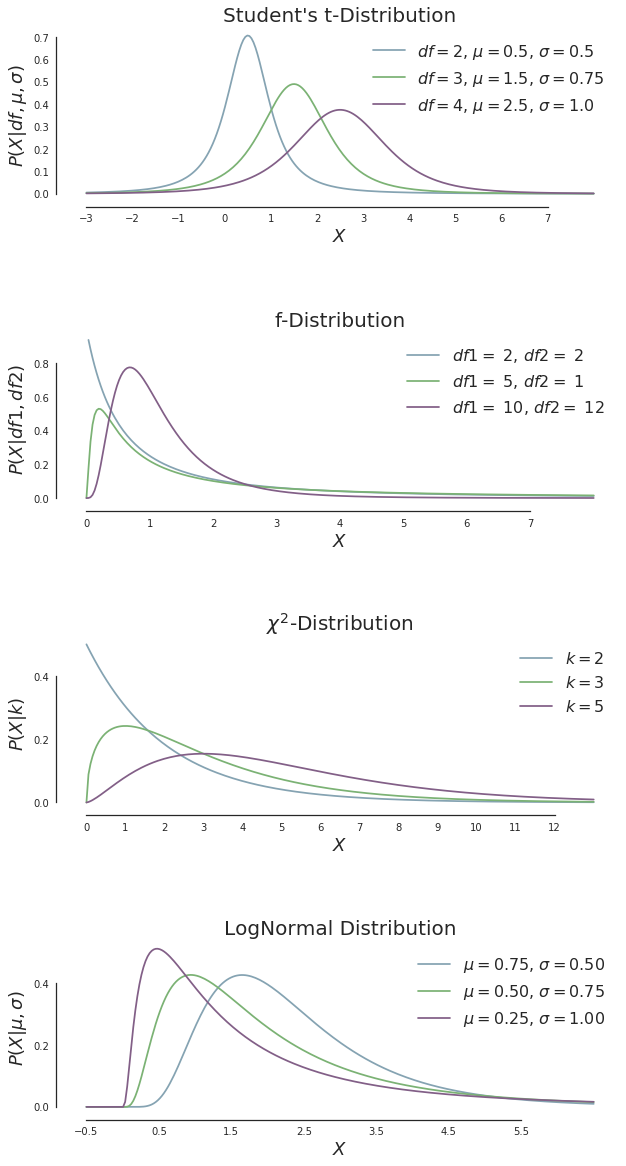

In [5]:
from scipy.stats import t, f, chi2, lognorm


def make_plots(axs, x, fd_list, lbl, ylbl, title):
    for idx in range(len(fd_list)):
        axs.plot(x, fd_list[idx].pdf(x), color=g_colors[2 + idx], label=lbl[idx])

    # Decorate plot
    axs.set_xticks(np.arange(np.min(x), np.max(x)))
    axs.set_xlabel(r"$X$", fontsize=18)
    axs.set_ylabel(ylbl, fontsize=18)
    axs.set_title(title, fontsize=20)
    axs.legend(fontsize=16)
    sns.despine(offset = 5, trim=True)

# Now we create our figure and axes for the plot we will make.
fig, axs = plt.subplots(figsize=(10, 20), nrows=4, ncols=1)
fig.subplots_adjust(hspace=.75)

# Compute and plot Student's t-Distribution
t_params = [(2, 0.5, 0.5), (3, 1.5, 0.75), (4, 2.5, 1.0)]
ftl = [t(*params) for params in t_params]
tlbl = [r'$df = {0}$, $\mu = {1}$, $\sigma = {2}$'.format(*p) for p in t_params]

make_plots(axs[0], np.linspace(-3, 8, 250), ftl, tlbl, 
           r'$P(X | df, \mu, \sigma)$', "Student's t-Distribution")

# Compute and plot f-Distribution
f_params = [(2, 2), (5, 1), (10, 12)]
ffl = [f(*params) for params in f_params]
flbl = [r'$df1 =$ {0}, $df2 =$ {1}'.format(*p) for p in f_params]

make_plots(axs[1], np.linspace(0, 8, 250), ffl, flbl, 
           r'$P(X | df1, df2)$', "f-Distribution")

# Compute and plot ChiSqaured Distribution
c_params = [2, 3, 5]
fcl = [chi2(params) for params in c_params]
clbl = [r'$k = {0}$'.format(p) for p in c_params]

make_plots(axs[2], np.linspace(0, 13, 250), fcl, clbl, 
           r'$P(X | k)$', r"$\chi^2$-Distribution")

# Compute and plot LogNormal Distribution
ln_params = [(0.5, 0.0, np.exp(0.75)), (.75, 0.0, np.exp(0.5)), (1.0, 0.0, np.exp(0.25))]

flnl = [lognorm(*params) for params in ln_params]
lnlbl = [f'$\mu = {np.log(p[2]):4.2f}$, $\sigma = {p[0]:4.2f}$' for p in ln_params]

make_plots(axs[3], np.linspace(-0.5, 6.5, 250), flnl, lnlbl, 
           r'$P(X | \mu, \sigma)$', "LogNormal Distribution")

-----


### Power-Law

The [_Power-law_][wpl] distribution is seen frequently in situations where there are many small items and fewer large items, or where physical conditions are determined by polynomial relations (like mass and height). A classic example is incomes for a large group of individuals, as there are many people with small incomes and very few with large incomes. Other examples include populations in cities, masses of different species, or frequencies of word counts. In addition, certain critical events, such as landslides, can be modeled by using a Power-law distribution. Finally, other distributions (including the _Pareto_ or _Zipf_ distributions) can be considered special cases of the general Power-law distribution. 

As a general form, we can consider a minimum cutoff ($x_{min}$), and a scaling exponent ($\alpha$).

$$ P(x) = \frac{\alpha - 1}{x_{min}}\left(\frac{x}{x_{min}}\right)^{-\alpha} $$ 

To use a Power-law distribution in Python, we use the [`powerlaw`][spl] object within the SciPy module. The SciPy `powerlaw` distribution takes a single, real valued argument, `a`, which must be greater than zero. 

```python
from scipy.stats import powerlaw

pld = powerlaw(a=1.25)
```

By default, in SciPy this distribution is defined over the range $0 \leq x \leq 1$. Additional parameters (`loc` and `scale`) can be specified to extend the range over which the distribution is defined.

### Exponential

An [_Exponential_][we] distribution describes the time between events that occur continuously and at a constant rate (i.e., a Poisson process). The Exponential distribution can be used to model decay of radioactive particles, the maximum rainfall in a set period of time, the time between telephone calls, and the time until a default in certain credit risk modeling. 

Note, even if a process generates events at a constant rate, the Exponential distribution can be applied over a time that the rate is nearly constant, for example, the time during which calls are generally made. One interesting result of the Exponential distribution is that the time to the next event (such as a phone call) is independent of the time since the last call. This property is formally known as being **memoryless**. 

Given a rate parameter: $\lambda$, we have the following probability density function for the Exponential distribution:

$$
P(x) = \lambda e^{- \lambda x}
$$

if $x \geq 0$ and zero otherwise. For this PDF, an Exponential distribution has mean value $\mu = \lambda^{-1}$  and variance $\sigma^2 = \lambda^{-2}$.

In Python, we use the [`expon`][se] object within the SciPy module to generate and use Exponential distributions. To set the rate parameter for the `expon` object, you set the `scale` parameter to the inverse of the rate parameter:

```python
from scipy.stats import expon

ed = expon(scale=1.25)
```

In SciPy, this distribution is defined only for $x \geq 0$.


### Pareto

A [_Pareto_][wp] distribution is a special case of the Power-law distribution, originally developed to describe the allocation of wealth, where 20% of the population was inferred to control 80% of the wealth. Thus, the Pareto distribution informally refers to distributions that follow the 80-20 rule (or a similar pre-defined allocation) with scale parameter $\alpha$.  This distribution can be used to model the sizes of human settlements, values in oil fields, sizes of sand particles, or the standardized price returns on individual stocks.

Formally, for any $x > x_m$, the probability density function for a Pareto distribution is given by
$$
P(X > x) = \frac{\alpha x_m^{\alpha}}{x^{\alpha + 1}}
$$

with mean value

$$\mu = \frac{\alpha x_m}{\alpha - 1}$$

and variance 

$$\sigma^2 = \frac{\alpha x_m^2}{(\alpha - 1)^2(\alpha - 2)}$$

In Python, we use the `pareto` object within the SciPy module to generate and use Pareto distributions. To specify a scale parameter when creating this distribution, set the `b` parameter to the desired scale value.

```python
from scipy.stats import pareto

bd = pareto(b=1.25)
```

In SciPy, this distribution is only defined for $ x \geq 1$. To shift the distribution, the `loc` and `scale` parameters can be specified.


### Cauchy

The [_Cauchy_][wc] distribution appears when solving different physical conditions or mathematical expressions, and also results from the ratio of two independent normally distributed random variables. The Cauchy distribution is the canonical **pathological** distribution in that both the mean and variance for a Cauchy distribution are undefined. Formally, the probability density function for a Cauchy distribution is given by

$$
P(x) = \frac{1}{\pi \gamma}\left[\frac{\gamma^2}{(x - x_0)^2 + \gamma^2}\right]
$$

In Python, we generate and use a Cauchy distribution by using the `cauchy` object in the SciPy module. By default, $\gamma$ and $x_0$ are assumed to be one.

```python
from scipy.stats import cauchy

cd = cauchy(scale=1.25)
```

The distribution can be shifted by specifying the `loc` and `scale` parameters.

-----
[wpl]: https://en.wikipedia.org/wiki/Power_law#Power-law_probability_distributions
[spl]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.powerlaw.html

[we]: http://en.wikipedia.org/wiki/Exponential_distribution
[se]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

[wp]: http://en.wikipedia.org/wiki/Pareto_distribution
[sp]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html

[wc]: https://en.wikipedia.org/wiki/Cauchy_distribution
[sc]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html

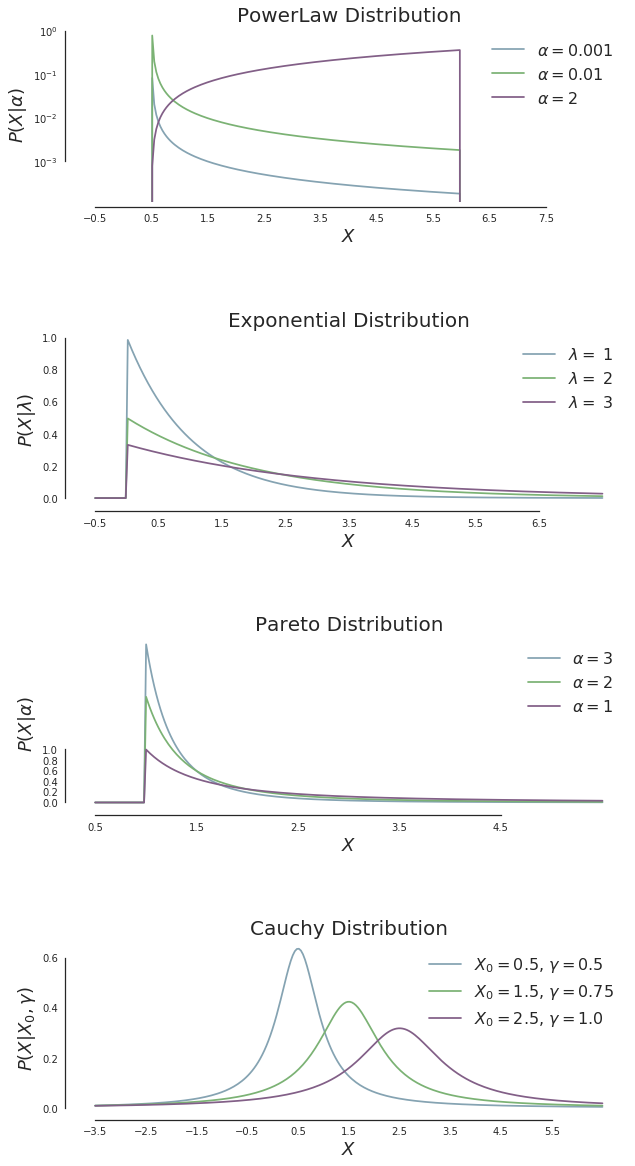

In [6]:
from scipy.stats import powerlaw, expon, pareto, cauchy

# Now we create our figure and axes for the plot we will make.
fig, axs = plt.subplots(figsize=(10, 20), nrows=4, ncols=1)
fig.subplots_adjust(hspace=.75)

# Compute and plot Scipy PowerLaw Distribution
pl_params = [0.001, 0.01, 2]
fpll = [powerlaw(p, 0.5, 5.5) for p in pl_params]
pllbl = [r'$\alpha = {0}$'.format(p) for p in pl_params]

# Scale y-axis to be logarithmic for clarity
axs[0].set_yscale('log')

make_plots(axs[0], np.linspace(-0.5, 8.5, 250), fpll, pllbl, 
           r'$P(X | \alpha)$', "PowerLaw Distribution")

# Compute and plot Exponential Distribution
e_params = [1, 2, 3]
fel = [expon(scale=p) for p in e_params]
elbl = [r'$\lambda =$ {0}'.format(p) for p in e_params]

make_plots(axs[1], np.linspace(-0.5, 7.5, 250), fel, elbl, 
           r'$P(X | \lambda)$', "Exponential Distribution")

# Compute and plot Pareto Distribution
p_params = [3, 2, 1]
fpl = [pareto(p) for p in p_params]
plbl = [r'$\alpha = {0}$'.format(p) for p in p_params]

make_plots(axs[2], np.linspace(0.5, 5.5, 250), fpl, plbl, 
           r'$P(X | \alpha)$', r"Pareto Distribution")

# Compute and plot Cauchy Distribution
ca_params = [(0.5, 0.5), (1.5, 0.75), (2.5, 1.0)]
fcal = [cauchy(*p) for p in ca_params]
calbl = [r'$X_0 = {0}$, $\gamma = {1}$'.format(*p) for p in ca_params]

make_plots(axs[3], np.linspace(-3.5, 6.5, 250), fcal, calbl, 
           r'$P(X | X_0, \gamma)$', "Cauchy Distribution")

-----

## Random Sampling

One of the most powerful uses for a theoretical distribution is the creation of a sample of random values from the specified distribution. All distributions in the SciPy module have an `rvs` method that will sample a specified number of random variables from the parent distribution. The number sampled is specified by the `size` parameter. This process is demonstrated in the following two code blocks. 

First, we create a Normal distribution, generate a sample of ten thousand random values, and finally compare a histogram of the random values to the theoretical distribution.  Note how the agreement between the two is extremely strong. Second, we create an Exponential distribution and generate a new sample of ten thousand random values. This time we compare the histogram of the sampled random values to the theoretical distribution on a regular, linear plot, and also a plot where the y-axis has a logarithmic scaling. The second version clearly shows the strong agreement between the Exponential distribution and sampled random values.

-----

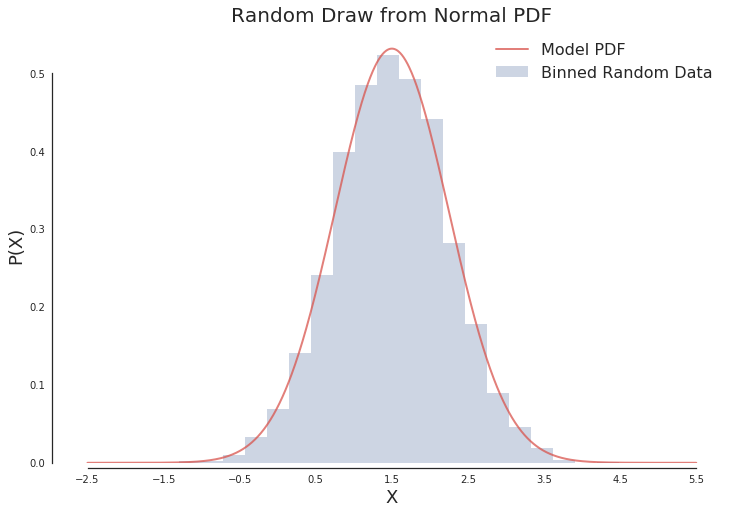

In [7]:
fig, axs = plt.subplots(figsize=(12, 8))

nd = norm(1.5, .75)

x = np.linspace(-2.5, 5.5, 1000)

axs.plot(x, nd.pdf(x), lw=2, alpha=0.75, 
         color=g_colors[0], label='Model PDF')
    
data = nd.rvs(10000)
axs.hist(data, bins=20, normed=True, histtype='bar', lw=4, alpha=0.25, 
         color=g_colors[1], label='Binned Random Data')

axs.set_xlabel('X', fontsize=18)
axs.set_xticks(np.arange(np.min(x), np.max(x) + 1))
axs.set_ylabel('P(X)', fontsize=18)
axs.set_title("Random Draw from Normal PDF", fontsize=20)

axs.legend(fontsize=16)
sns.despine(offset = 5, trim=True)    

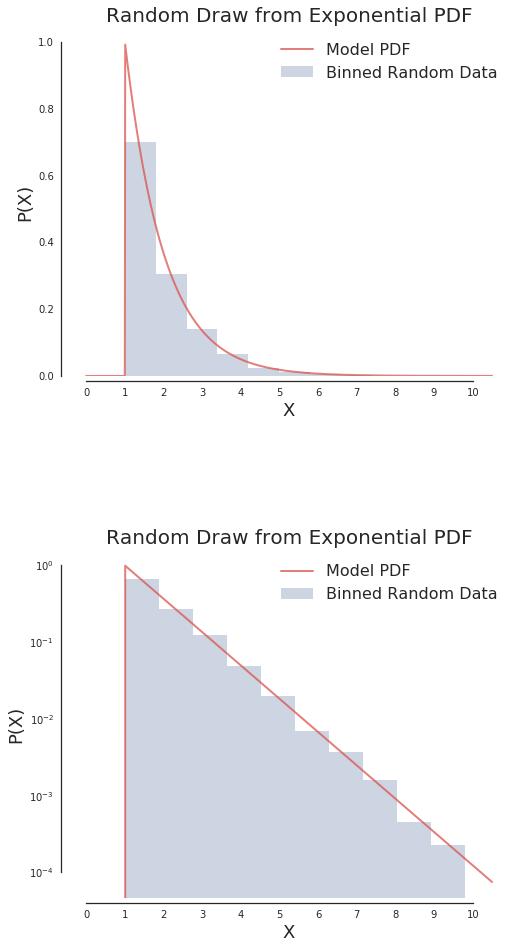

In [8]:
# Two figures, one over the other
fig, axs = plt.subplots(figsize=(8, 16), nrows=2, ncols=1)
fig.subplots_adjust(hspace=.5)

# Helper function that draws random data from exponential
# and also computes the PDF, and plots the results
def plot_exp(axs, lam = 1.0):

    ed = expon(lam)

    x = np.linspace(0, 10.5, 1000)
    axs.plot(x, ed.pdf(x), lw=2, alpha=0.75, 
             color=g_colors[0], label='Model PDF')
    
    data = ed.rvs(10000)
    axs.hist(data, normed=True, histtype='bar', lw=4, alpha=0.25, 
             color=g_colors[1], label='Binned Random Data')

    axs.set_xlabel('X', fontsize=18)
    axs.set_xticks(np.arange(np.min(x), np.max(x)))
    axs.set_ylabel('P(X)', fontsize=18)
    axs.set_title("Random Draw from Exponential PDF", fontsize=20)

    axs.legend(fontsize=16)
    sns.despine(offset = 5, trim=True)
    
# We plot the first one normally
plot_exp(axs[0])

# We plot the second one with logarithmic scaling on the y-axis
axs[1].set_yscale('log')
plot_exp(axs[1])

-----

## Alternative Distribution Forms

To this point, we have focused on the probability density functions for specific theoretical distributions. There are, however, other forms for these distribution functions that can be important in solving specific problems as they may simplify the resulting analysis. In this section, we will discuss four specific forms:
1. Cumulative distribution function (CDF)
2. Percent point function (PPF).
3. Survival function (SF).
4. Inverse survival function.

The [cumulative distribution function][wcdf] specifies the probability that a real-valued random variable will have a value less than or equal to a specific value, $x$. Thus, for a continuous distribution, the CDF is the area under the PDF from minus infinity to $x$. The CDF is used frequently in hypothesis testing and in Monte Carlo integration, and is given by the following expression, where $f_X(x)$ is a function evaluated at $x$ of the real valued, random variable $X$.

$$ F_X(x) = P(X \leq x) = \int_{-\infty}^x f(u)\ du$$

One important result that follows from this definition is that the cumulative probability between two limits $(a, b]$ is given by the difference in the CDF evaluated at these two points:

$$ P(a < X \leq b) = F_X(b) - F_X(a)$$

The [percent point function][wqf] of a real-valued, random variable $x$, alternatively known as the quantile function or inverse cumulative distribution function, specifies the value of random variable at which the probability of getting $x$ is less than or equal to the given probability. Alternatively, you can view this function as stating the value of $x$ for which the CDF has a specific value $p$. Thus in a simple one-dimensional example, given a probability, $p$, the PPF indicates the value $x$ at which the PDF has probability equal to or less than the target probability $p$. The PPF can be useful in determining quantiles, quartiles, and the median, and also in random number generation.

The [survival function][wsf], $S(t)$, gives the probability that a real-valued random variable will exceed a specific value $x$. Often the variable is time, and the survival function indicates the probability an item, such as a mechanical device, a patient, or other item will last (or survive) beyond a given time. This function is given by $1 - CDF$. 

$$ S(t) = P( T > t) = \int_t^{\infty} f(u)\ du = 1 - F(t)$$

The inverse of this function, called the [inverse survival function][wis], gives the real-valued random variable at which the probability of surviving is less than or equal to the target probability $p$.

The following code cell displays these four functions, along with the probability density function (PDF) for a Normal distribution. In addition, the standard quartiles are displayed to provide an additional reference point in interpreting these other distribution forms.

-----

[wcdf]: https://en.wikipedia.org/wiki/Cumulative_distribution_function
[wqf]: https://en.wikipedia.org/wiki/Quantile_function
[wsf]: https://en.wikipedia.org/wiki/Survival_function
[wis]: https://en.wikipedia.org/wiki/Survival_function

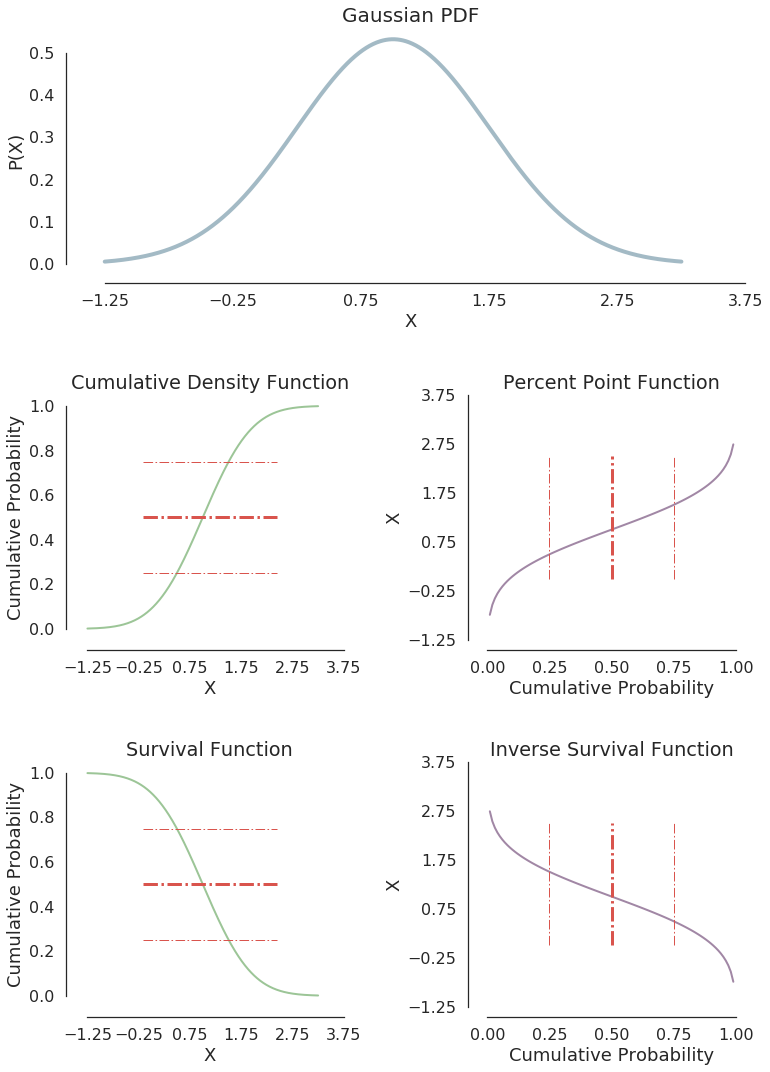

In [9]:
# Now Seaborn specific modifications
sns.set_context("poster", font_scale=1.0)
sns.set_style("white")

# Now we create our figure and axes for the plot we will make.
fig = plt.figure(figsize=(12, 18))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

# Define plot layout
#fig, ax = plt.subplots()
ax1 = plt.subplot2grid((3,2), (0,0), colspan=2)
ax2 = plt.subplot2grid((3,2), (1,0))
ax3 = plt.subplot2grid((3,2), (1, 1))
ax4 = plt.subplot2grid((3,2), (2, 0))
ax5 = plt.subplot2grid((3,2), (2, 1))

mean = 1.0
sigma = 0.75

# Freeze normal distribution
dist = norm(loc=mean, scale=sigma)

# Define variate and probability arrays
x = np.linspace(mean - 3. * sigma, mean + 3. * sigma, 1000)
p = np.linspace(0, 1.0, 100)

# Plot functional distributions
ax1.plot(x, dist.pdf(x), lw=4, alpha=0.75, color=g_colors[2])
ax2.plot(x, dist.cdf(x), lw=2, alpha=0.75, color=g_colors[3])
ax3.plot(p, dist.ppf(p), lw=2, alpha=0.75, color=g_colors[4])
ax4.plot(x, dist.sf(x), lw=2, alpha=0.75, color=g_colors[3])
ax5.plot(p, dist.isf(p), lw=2, alpha=0.75, color=g_colors[4])

# Show 'special' probabilities

# First horizontal lines
ax2.axhline(0.25, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')
ax2.axhline(0.5, 0.25, 0.75, color=g_colors[0], lw=3, ls = '-.')
ax2.axhline(0.75, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')

ax4.axhline(0.25, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')
ax4.axhline(0.5, 0.25, 0.75, color=g_colors[0], lw=3, ls = '-.')
ax4.axhline(0.75, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')

# Second vertical lines
ax3.axvline(0.25, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')
ax3.axvline(0.5, 0.25, 0.75, color=g_colors[0], lw=3, ls = '-.')
ax3.axvline(0.75, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')

ax5.axvline(0.25, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')
ax5.axvline(0.5, 0.25, 0.75, color=g_colors[0], lw=3, ls = '-.')
ax5.axvline(0.75, 0.25, 0.75, color=g_colors[0], lw=1, ls = '-.')

# Set the title
ax1.set_title("Gaussian PDF", fontsize=20)
ax1.set_xlabel('X', fontsize=18)
ax1.set_xticks(np.arange(np.min(x), np.max(x) + 1))
ax1.set_ylabel('P(X)', fontsize=18)

ax2.set_title("Cumulative Density Function")
ax2.set_xlabel('X', fontsize=18)
ax2.set_xticks(np.arange(np.min(x), np.max(x) + 1))
ax2.set_ylabel('Cumulative Probability', fontsize=18)

ax3.set_title("Percent Point Function")
ax3.set_xlabel('Cumulative Probability', fontsize=18)
ax3.set_yticks(np.arange(np.min(x), np.max(x) + 1))
ax3.set_ylabel('X', fontsize=18)

ax4.set_title("Survival Function")
ax4.set_xlabel('X', fontsize=18)
ax4.set_xticks(np.arange(np.min(x), np.max(x) + 1))
ax4.set_ylabel('Cumulative Probability', fontsize=18)

ax5.set_title("Inverse Survival Function")
ax5.set_xlabel('Cumulative Probability', fontsize=18)
ax5.set_yticks(np.arange(np.min(x), np.max(x) + 1))
ax5.set_ylabel('X', fontsize=18)

# Now Seaborn specific modifications
sns.despine(offset=10, trim=True)

-----

## Central Limit Theorem

The importance of the Normal (or Gaussian) distribution is hard to overstate. Not only do many data set in Nature display _normality_, but the Normal distribution can often be applied to the analysis of data that have been sampled repeatedly from a different distribution that is non-normal. 

Assume we have been given a set of $n$ data points. Formally, as long as all of these data are
1. mutually independent,
2. drawn from a common distribution, and
3. the mean ($\mu$) and standard deviation ($\sigma$) of the data points are finite,
   
then the [**Central Limit Theorem**][wclt], or (**CLT**) states that the sample average of these data points is Normally distributed with mean ($\mu$) and variance ($\sigma^2/n$):

$$P\left(x = \frac{1}{n}\sum_i^n x_i \right) \rightarrow 
\sqrt{\frac{n}{2 \pi \sigma^2}}\exp{\left(-\frac{n (x - \mu)^2}{2 \sigma^2} \right)} $$

The first two items in the previous list are often shortened to **iid**, which is an abbreviation for _independent and identical distributed_. This theorem essentially implies that sums of random quantities will be approximately distributed as a normal distribution, with the accuracy of the approximation determined by the number of points ($n$). In addition, the CLT often leads analysts to _average out the noise_ and to _assume a Normal model_. While these conditions are often met, and thus the last two steps are valid, one should always exert caution and be sure that all conditions are met before jumping to strong assumptions.

The CLT is demonstrated in the following code cell, where we repeatedly simulate the process of flipping ten coins. By progressively increasing the number of samples that we accumulate, we can see that as $n$ increases our data set becomes increasingly well modeled by a Normal distribution.

----
[wclt]: https://en.wikipedia.org/wiki/Central_limit_theorem

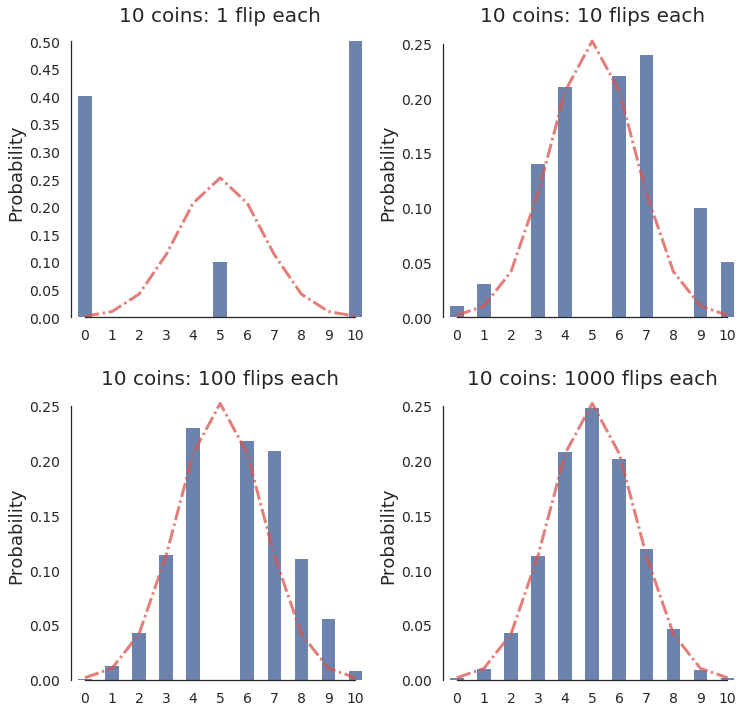

In [10]:
from scipy.stats import binom

# Parameters for our distribution
ph = 0.5       # Probability of heads
trails = 10  # Number of trails (ten coins)

# Convenience function to flip a coin x *times*, 
# and plot the results.
def plot_coinspmf(p, trails, times, axes):

    # Build an array of coin flips
    flips = binom.rvs(trails, p, size=times)
    
    # Now histogram them, two bins, heads or tails
    results, _ = np.histogram(flips, bins=int(trails + 1))
    
    # For simplicity turn into a Pandas Series.
    coins = pd.Series(results) / np.sum(results)
    x = np.arange(11)
  
    # Now plot the coin flip results
    ax = coins.plot.bar(ax=axes, color=g_colors[1], alpha = 0.75,
                        fontsize=14, rot=0, 
                        xticks=x, yticks=np.linspace(0, 0.5, 11))
    
    if times // trails > 1:
        title = f'{trails} coins: {times // trails} flips each'
    else:
        title = f'{trails} coins: {times // trails} flip each'
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel("Probability", fontsize=18)
    
    # Now make a Gaussian and overplot.
    mu = trails * p
    sigma = np.sqrt(trails * p * (1 - p))
    norm = 1./(sigma * np.sqrt(2 * np.pi))
    y = norm * np.exp(-1. * (x - mu)**2/(2. * sigma**2))
    ax.plot(x, y, linewidth=3, linestyle ='-.', 
            color=g_colors[0], alpha = 0.75)

    sns.despine(trim='True', left = False, right=True)

# Create figure
fig, axs = plt.subplots(figsize=(12, 12), nrows=2, ncols=2)
adj = plt.subplots_adjust(hspace=0.25, wspace =0.25)

# Perform coin flip simulations
plot_coinspmf(ph, trails, 10, axs[0][0])
plot_coinspmf(ph, trails, 100, axs[0][1])
plot_coinspmf(ph, trails, 1000, axs[1][0])
plot_coinspmf(ph, trails, 10000, axs[1][1])

-----

## QQ Plot

Given a data set, one approach for gaining insight is to determine whether a specific distribution is a good match for one or more columns or features. For the _Normal_ distribution, the standard technique for testing this assumption is the quantile-quantile plot, or [QQ-plot][wqq]. Effectively this plot sorts the data and compares the empirical distribution of the data to the theoretical distribution. If the empirical data lie on (or close to) a diagonal (or 45 degree ) line in a QQ-plot, the data can be effectively modeled by the target theoretical distribution (e.g., a Normal distribution).

To make this plot, we use the [`ProbPlot`][smp] object from the _Statsmodel_ module. As shown below, we can create a `ProbPlot` object by passing in normally distributed data, along with the data distribution to which we wish to compare the data (in this case a standard Normal distribution). We next create a [`qqplot`][smqq] objects to make the quantile-quantile plot, along with a [`qqline`][smql] to display the diagonal line that aids in the interpretation of the match between our data and the selected distribution. 

This technique is demonstrated in the next two code cells, where we first generate normally distributed random data and compare to a _Normal_ distribution. The agreement is quite good (as expected), indicating that our data is modeled nicely by using a Normal distribution. In the second example, we generate log-normally distributed random data, which is not (again, as expected) well matched by a Normal distribution. Note, a QQ-Plot is not restricted to using a Normal distribution, but given the prevalence of Normal distributions in Nature, a QQ-Plot is often used as a test for Normality.

-----
[smp]: http://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.ProbPlot.html
[smql]: http://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqline.html
[smqq]: http://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html
[wqq]: https://en.wikipedia.org/wiki/Q–Q_plot

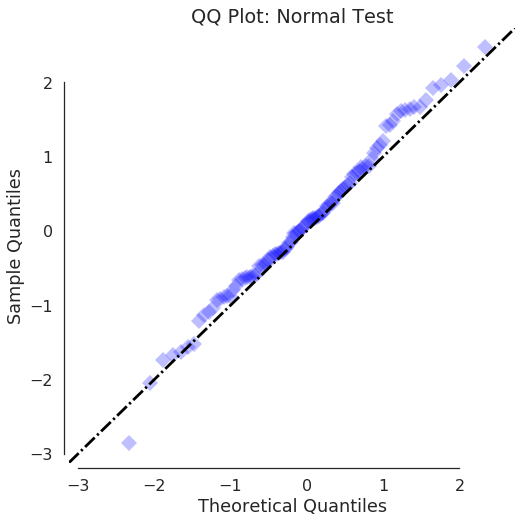

In [11]:
# We use functions from the Statsmodel module
import statsmodels.api as sm

# Create figure
fig, axs = plt.subplots(figsize=(8, 8))

# Create normal distributed data
nd = norm(0, 1)

# Setup Probability comparison plot
pp = sm.ProbPlot(nd.rvs(100), dist=norm)

# Create and show QQ-Plot
qq = pp.qqplot(ax=axs, marker='D', markeredgecolor=g_colors[4], alpha=0.25)
axs = qq.axes[0]

# Show QQ Line (45 angle)
sm.qqline(axs, line='45', fmt='k-.')

# Decorate
axs.set_title('QQ Plot: Normal Test')
sns.despine(offset=5, trim=True)

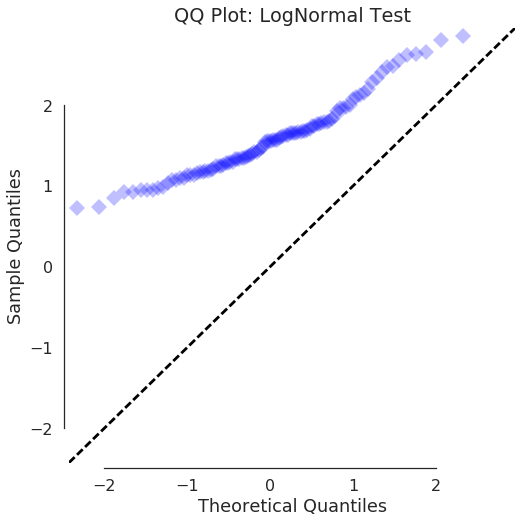

In [12]:
# Create figure
fig, axs = plt.subplots(figsize=(8, 8))

# Create lognormal distributed data
lnd = lognorm(0.5, 0.5)

# Setup Probability comparison plot
pp = sm.ProbPlot(lnd.rvs(100), dist=norm)

# Create and show QQ-Plot
qq = pp.qqplot(ax=axs, marker='D', markeredgecolor=g_colors[4], alpha=0.25)
axs = qq.axes[0]

# Show QQ Line (45 angle)
sm.qqline(axs, line='45', fmt='k--')

# Decorate
axs.set_title('QQ Plot: LogNormal Test')
sns.despine(offset=5, trim=True)

-----

## Fitting Distributions

On the other hand, if we have a reason to expect our data can be modeled by a specific theoretical distribution, we can [directly fit][gp] the data by using the scipy module. Each distribution in the scipy module includes a `fit` method, which will compute the best fit parameter values for the specific distribution to the provided data. We demonstrate this in the following code cell where we generate normally distributed data, and next use the `fit` method on the Normal distribution to determine the best fit _Normal_ distribution mean and standard deviation. Finally, we plot the binned normally distributed data along with the original theoretical Normal distribution and best fit Normal distribution. 

Since the data generation is a random process, each time the code cell is run the results will be different. Thus, even though the process demonstrating this technique might seem circular, the agreement is usually quite good (or strong), which might be surprising. In practice, one would most likely generate a qq-plot to determine if a Normal distribution would provide a good match for a data set, after which the best fit distribution can be computed from the data.

The importance of this process is hard to overstate. Having a model for a data set can provide both physical insight into what generated the data, as well as the ability to generate new data that should appear indistinguishable from the original data set. This later technique can prove useful in situations where obtaining new data can be either prohibitively expensive or even impossible due to physical constraints.

-----
[gp]: http://glowingpython.blogspot.de/2012/07/distribution-fitting-with-scipy.html

Model Mean =  -1.50
Model Std  =   1.25

Fit Mean = -1.465
Fit Std  =  1.223



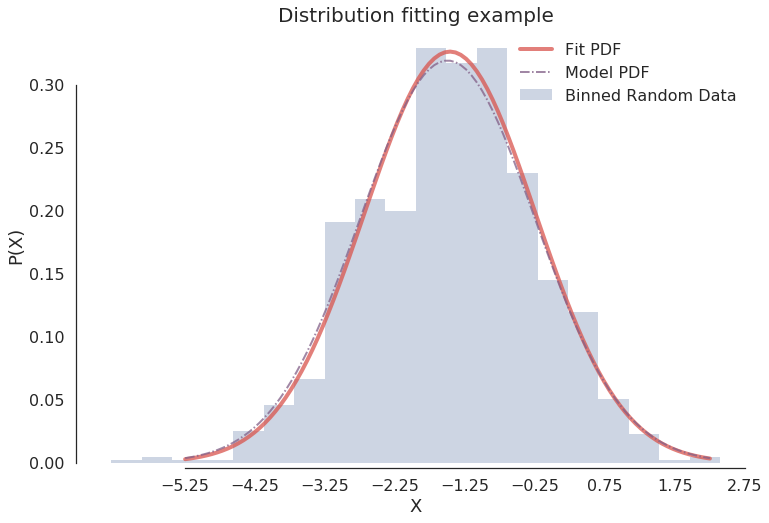

In [13]:
# Generate random data from normal distribution
mean = -1.5
sigma = 1.25
model = norm(mean, sigma)
data = model.rvs(size=1000)
print(f'Model Mean = {mean:6.2f}')
print(f'Model Std  = {sigma:6.2f}\n')

# Fit a Normal distribution to the data
fit_params = norm.fit(data)
fit_dist = norm(loc=fit_params[0], scale=fit_params[1])

print(f'Fit Mean = {fit_params[0]:6.3f}')
print(f'Fit Std  = {fit_params[1]:6.3f}\n')

# Define variate
x = np.linspace(mean - 3. * sigma, mean + 3. * sigma, 100)

# Plot data and fitted model
fig, axs = plt.subplots(figsize=(12, 8))

# Plot Fit
axs.plot(x, fit_dist.pdf(x), lw=4, alpha=0.75, 
         color=g_colors[0], label='Fit PDF')

# Plot Model
axs.plot(x, model.pdf(x), lw=2, ls='-.', alpha=0.75, 
         color=g_colors[4], label='Model PDF')

# Plot data
axs.hist(data, bins=20, normed=True, histtype='bar', lw=4, alpha=0.25, 
         color=g_colors[1], label='Binned Random Data')

axs.set_xlabel('X', fontsize=18)
axs.set_xticks(np.arange(np.min(x), np.max(x) + 1))
axs.set_ylabel('P(X)', fontsize=18)
axs.set_title("Distribution fitting example", fontsize=20)

axs.legend(fontsize=16)
sns.despine(offset = 5, trim=True)    

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to gnerate data from a different distribution, such as a lognormal, and then fit the data with the new distribution.

-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

2. [Statistics tutorial][2] from Scipy
10. A somewhat dated blog article on simple [statistical analysis in Python][oneau]
3. A blog article on using [distributions from Python][dp]

-----

[oneau]: https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/
[2]: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
[4]: https://ipython-books.github.io/featured-07/
[dp]: https://www.johndcook.com/blog/distributions_scipy/

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 